# Classification with the frequentist neural network approach
Probabilistic Programming Project 2, Olteanu Fabian Cristian, FMI, AI Master, Year 1

In [11]:
import keras 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

## Binary case

Preparing the data

In [67]:
data = pd.read_csv('data/dataset_binary.csv')
train_idx = np.concatenate(np.array(pd.read_csv('data/train_idx_binary.csv', header = None)) - 1) #reducing by one because Julia starts indexing at 1 instead of 0
test_idx = np.concatenate(np.array(pd.read_csv('data/test_idx_binary.csv', header = None)) - 1)

train_data = data.iloc[train_idx]
train_labels = train_data['label']
train_data = train_data.drop('label', axis=1)

test_data = data.iloc[test_idx]
test_labels = test_data['label']
test_data = test_data.drop('label', axis=1)

Constructing the neural network using the architecture used in the bayesian approach

In [68]:
nn_model = Sequential()
nn_model.add(Dense(3, input_dim = 2, activation = 'tanh'))
nn_model.add(Dense(2, activation = 'tanh'))
nn_model.add(Dense(1, activation = 'sigmoid'))

nn_model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
history = nn_model.fit(
    train_data, train_labels, epochs = 100, batch_size = 64, 
    validation_data = (test_data, test_labels)
)

Epoch 1/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2496 - accuracy: 0.5040 - val_loss: 0.2493 - val_accuracy: 0.5100
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.5034 - val_loss: 0.2490 - val_accuracy: 0.5100
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.4911 - val_loss: 0.2489 - val_accuracy: 0.5600
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.6119 - val_loss: 0.2486 - val_accuracy: 0.5650
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.6011 - val_loss: 0.2483 - val_accuracy: 0.5500
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.5959 - val_loss: 0.2478 - val_accuracy: 0.5600
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.6180 - val_loss: 0.2471 - val_accuracy: 0.5650
Epoch 8/100
1

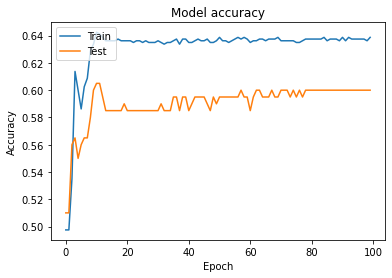

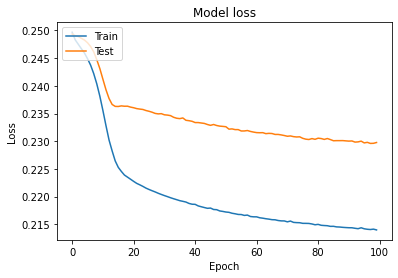

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## Multiclass case

In [15]:
data = pd.read_csv('data/dataset_multi.csv')
train_idx = np.concatenate(np.array(pd.read_csv('data/train_idx_multi.csv', header = None)) - 1)
test_idx = np.concatenate(np.array(pd.read_csv('data/test_idx_multi.csv', header = None)) - 1)

train_data = data.iloc[train_idx]
train_labels = train_data['label']
train_labels = to_categorical(train_labels)
train_data = train_data.drop('label', axis=1)

test_data = data.iloc[test_idx]
test_labels = test_data['label']
test_labels = to_categorical(test_labels)
test_data = test_data.drop('label', axis=1)

In [18]:
nn_model_multi = Sequential()
nn_model_multi.add(Dense(16, input_dim = 2, activation = 'relu'))
nn_model_multi.add(Dense(12, activation = 'relu'))
nn_model_multi.add(Dense(6, activation = 'relu'))
nn_model_multi.add(Dense(4, activation = 'softmax'))

nn_model_multi.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = nn_model_multi.fit(
    train_data, train_labels, epochs = 100, batch_size = 64, 
    validation_data = (test_data, test_labels)
)

Epoch 1/100
13/13 [==============================] - 0s 7ms/step - loss: 1.4182 - accuracy: 0.2386 - val_loss: 1.3773 - val_accuracy: 0.3300
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 1.3790 - accuracy: 0.2651 - val_loss: 1.3758 - val_accuracy: 0.2650
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 1.3715 - accuracy: 0.3032 - val_loss: 1.3725 - val_accuracy: 0.3850
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 1.3694 - accuracy: 0.3836 - val_loss: 1.3666 - val_accuracy: 0.3300
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 1.3633 - accuracy: 0.3259 - val_loss: 1.3613 - val_accuracy: 0.3300
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 1.3566 - accuracy: 0.3383 - val_loss: 1.3548 - val_accuracy: 0.3950
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 1.3529 - accuracy: 0.3801 - val_loss: 1.3442 - val_accuracy: 0.3650
Epoch 8/100
1

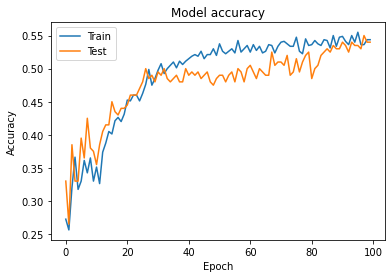

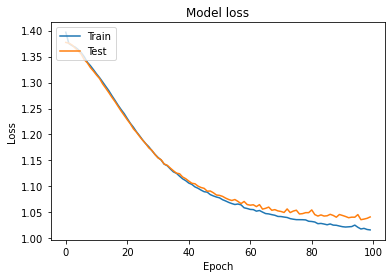

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()